In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft

In [4]:
r,p,k=scipy.signal.residue([1],[1,np.sqrt(2),1])

In [5]:
print(r)
print(p)
print(k)

[0.-0.70710678j 0.+0.70710678j]
[-0.70710678+0.70710678j -0.70710678-0.70710678j]
[]


: 

In [51]:
cos, pi, flip = np.cos, np.pi, np.flip

# Orden del filtro
M = int(input('Ingrese orden del filtro: '))
# A(k) o respuesta en frecuencia de mag. deseada

if M%2==0:
  len_A = int(M/2)
  flag_inv = 0
else:
  len_A = int((M+1)/2)
  flag_inv = -1

print(f'Ingrese A(k) con {len_A} datos')
#A = [1,1,1,1,.4,0,0,0]
A = np.zeros(len_A)
for i in range(len_A):
  A[i] = float(input(f'A[{i}] = '))
# Inicializamos h(n)
h = np.zeros(len(A))
# Aplicamos la fórmula
for n in range(len(h)):
  sum_k = 0
  for k in range(1,len(h)):
    sum_k += A[k]*(-1)**k*cos(pi*k/M*(2*n+1))
  h[n] = 1/M*(A[0]+2*sum_k)
# Aplicamos espejo por la simetría
h_inv = flip(h[:len(h)+flag_inv])
# Concatenamos para crear el h(n) completo
h = np.concatenate((h, h_inv))

Ingrese orden del filtro: 20
Ingrese A(k) con 10 datos
A[0] = 0
A[1] = 0
A[2] = .5
A[3] = 1
A[4] = 1
A[5] = .5
A[6] = 0
A[7] = .5
A[8] = 1
A[9] = .5


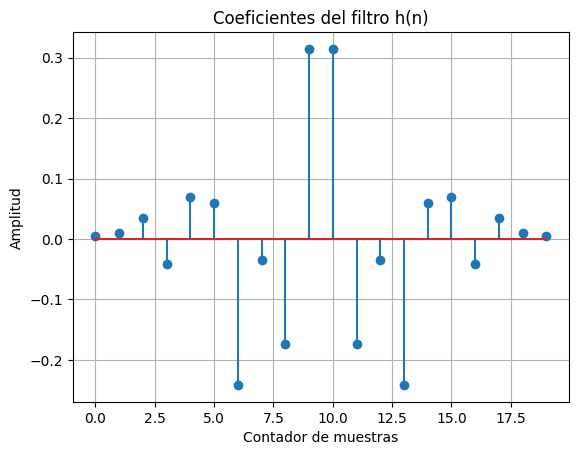

In [52]:
n = np.arange(M)
plt.stem(n, h)
plt.xlabel('Contador de muestras')
plt.ylabel('Amplitud')
plt.title('Coeficientes del filtro h(n)')
plt.grid(True)
plt.show()

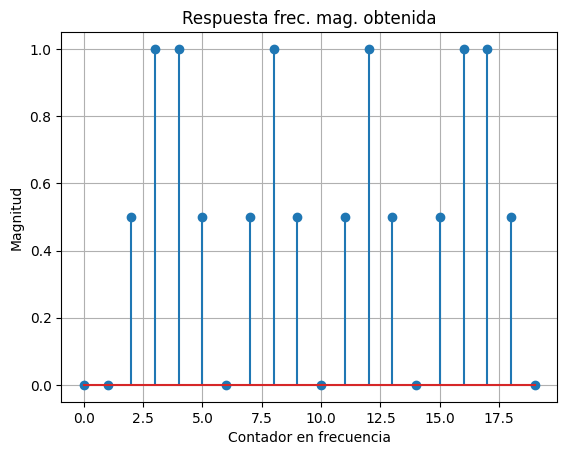

In [53]:
A_real = abs(fft(h))

k = np.arange(M)
plt.stem(k, A_real)
plt.xlabel('Contador en frecuencia')
plt.ylabel('Magnitud')
plt.title('Respuesta frec. mag. obtenida')
plt.grid(True)
plt.show()

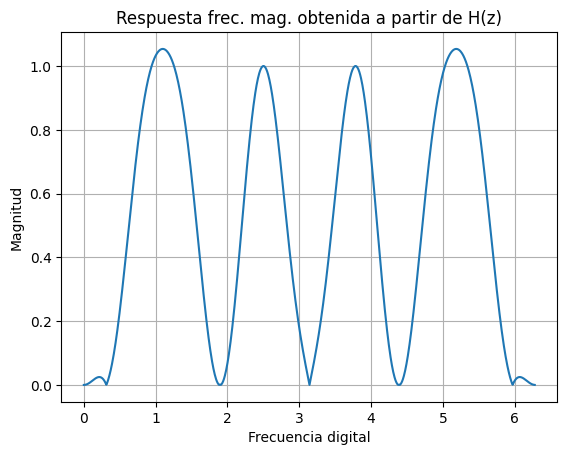

In [54]:
# Ahora hallamos la resp. frec. de mag. del filtro
# a partir de la func. de transferencia H(z)
w, H = scipy.signal.freqz(h, worN=1024, whole=True)
plt.plot(w, abs(H))
plt.xlabel('Frecuencia digital')
plt.ylabel('Magnitud')
plt.title('Respuesta frec. mag. obtenida a partir de H(z)')
plt.grid(True)
plt.show()

Ahora comparemos ambas respuestas en frecuencia de magnitud

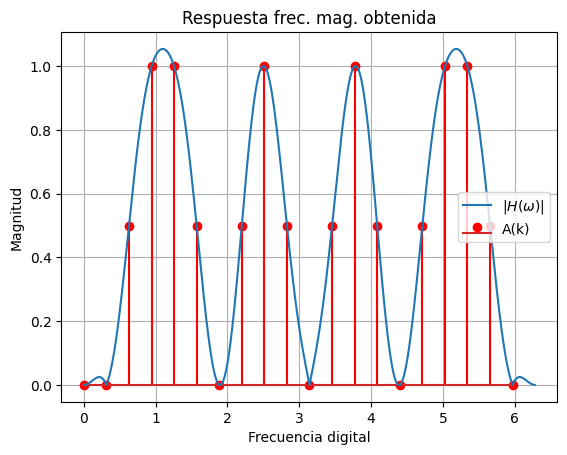

In [55]:
plt.stem(2*pi*k/M, A_real, 'r', label='A(k)')
plt.plot(w, abs(H), label=r'$|H(\omega)|$')
plt.xlabel('Frecuencia digital')
plt.ylabel('Magnitud')
plt.title('Respuesta frec. mag. obtenida')
plt.legend()
plt.grid(True)
plt.show()